# **Taller 2**

## **Análisis Inferencial Bivariado con Datos PISA 2009** 🏫

En este taller, nos enfocaremos en realizar análisis inferenciales bivariados utilizando datos de PISA 2009 para Chile. A lo largo de esta sesión, aprenderás a aplicar diversas pruebas estadísticas, como la prueba de Chi-Cuadrado, *U* de Mann-Whitney, la *H* de Kruskal-Wallis, la prueba *t* para muestras independientes, ANOVA, y las correlaciones (*r*) de Spearman y Pearson. Además, explorarás cómo interpretar y reportar los resultados de estas pruebas, apoyándote en visualizaciones gráficas que facilitarán la comprensión de las relaciones entre variables.

### **Instalación de Paquetes**

Comenzamos instalando los paquetes necesarios para esta sesión. Estos paquetes nos permitirán importar datos en formato SPSS, generar gráficos, calcular pruebas estadísticas como Chi-Cuadrado, y obtener estadísticas descriptivas detalladas.

In [2]:
!pip install pandas matplotlib seaborn scipy statsmodels Pyreadstat pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 11.6 MB/s eta 0:00:00


### **Carga de Bibliotecas**

A continuación, cargamos las bibliotecas de los paquetes que acabamos de instalar para hacer uso de sus funciones en el análisis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import numpy as np

### Configuración del Directorio de Trabajo
En Google Colab no es necesario cambiar el directorio de trabajo, solo cargar los archivos correctamente

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importación de Datos

En esta sección, importamos los datos del archivo SPSS (.sav) a R utilizando el paquete `pandas`, que convierte automáticamente los datos en un data frame para facilitar su manipulación y análisis.

In [1]:
import pandas as pd
import pyreadstat

# Cargar el archivo SPSS
pisa2009_chl = pd.read_spss('/content/drive/My Drive/Teaching/Metodología Cuantitativa II 2024/Sesión 2/pisa2009_chl.sav')
pisa2009_chl.head()

ModuleNotFoundError: No module named 'pyreadstat'

### Exploración Inicial de los Datos

Antes de realizar análisis estadísticos, es fundamental entender la estructura y contenido del conjunto de datos. Exploremos entonces brevemente el data frame, observando su clase, los primeros registros, los nombres de las variables, y obteniendo un resumen descriptivo básico.

In [ ]:
print(type(pisa2009_chl))  # Verifica la clase del objeto
print(pisa2009_chl.head())  # Muestra los primeros 6 casos de la base de datos
print(pisa2009_chl.columns)  # Lista los nombres de las variables
print(pisa2009_chl.shape)  # Muestra el número de variables y casos
print(pisa2009_chl.describe())  # Proporciona un resumen estadístico para cada variable
print(pisa2009_chl.info())  # Muestra la estructura interna del data frame

### Prueba de Chi-Cuadrado (χ2)

La prueba de Chi-Cuadrado (χ2) es útil para evaluar si existe una asociación estadísticamente significativa entre dos variables categóricas. Así, inferimos estadísticamente si dicha asociación existe en la población objetivo bajo un nivel de confianza (habitualmente con un 95%). En esta sección, analizaremos la relación entre el género de los estudiantes y el tipo de establecimiento en el que estudian.

#### Análisis Descriptivo para Variables Categóricas

Primero, generamos tablas de contingencia que muestran la distribución de las variables categóricas de interés. Estas tablas permiten observar la frecuencia y proporción de cada categoría, tanto de manera individual como cruzada entre dos variables.

In [ ]:
# Tabla de contingencia para una variable categórica
print(pisa2009_chl['sex'].value_counts())  # Distribución de género
print(pisa2009_chl['type'].value_counts())  # Distribución por tipo de establecimiento

# Tabla de contingencia para dos variables categóricas
print(pd.crosstab(pisa2009_chl['type'], pisa2009_chl['sex']))  # Distribución conjunta de género y tipo de establecimiento

# Tabla de porcentajes para variables categóricas por grupo de interés
# "normalize='columns'" entrega las proporciones de la distribución condicional de la variable 1 según la variable 2
print(pd.crosstab(pisa2009_chl['type'], pisa2009_chl['sex'], normalize='columns'))

sex
Male      2870
Female    2799
Name: count, dtype: int64
type
Private government-dependent    2174
Public                          2141
Private independent              166
Name: count, dtype: int64
sex                           Female  Male
type                                      
Private government-dependent    1119  1055
Private independent               99    67
Public                          1028  1113
sex                             Female      Male
type                                            
Private government-dependent  0.498219  0.472036
Private independent           0.044078  0.029978
Public                        0.457703  0.497987


#### Visualización de Variables Categóricas

Para visualizar la distribución de las variables categóricas, generamos gráficos de barras y gráficos circulares.

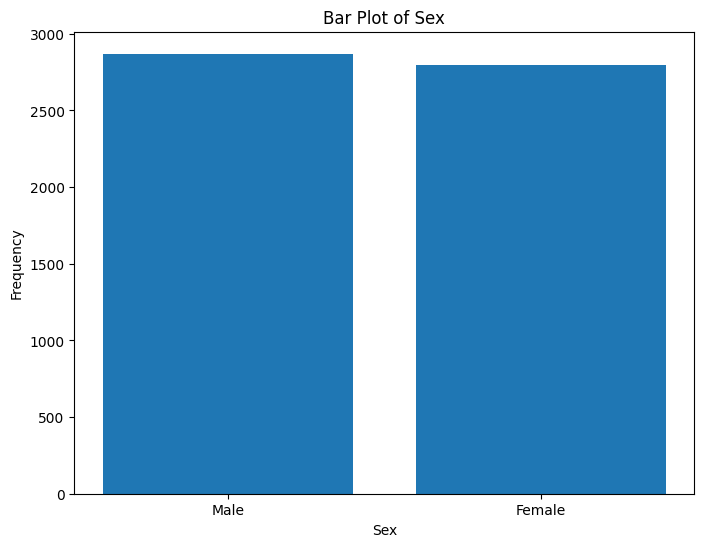

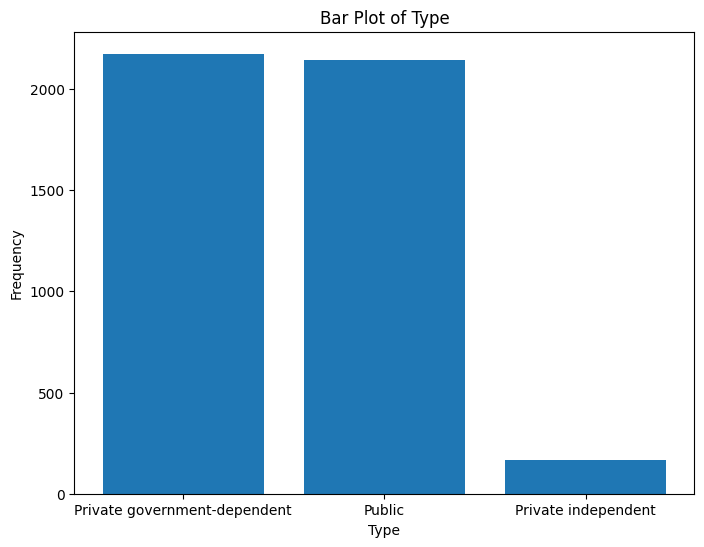

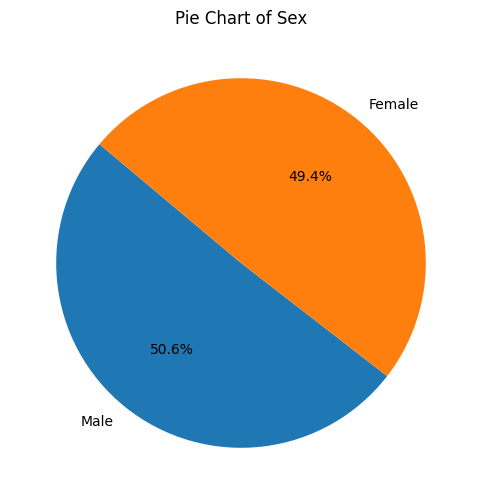

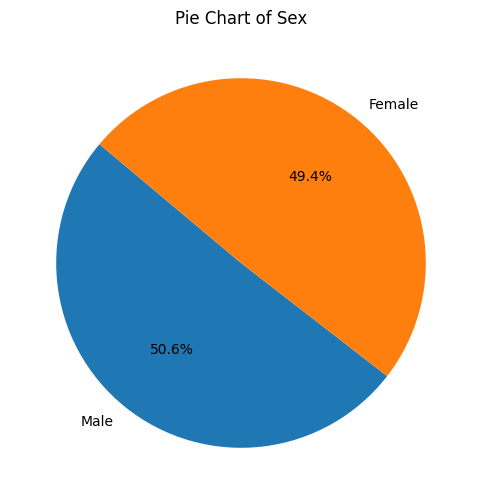

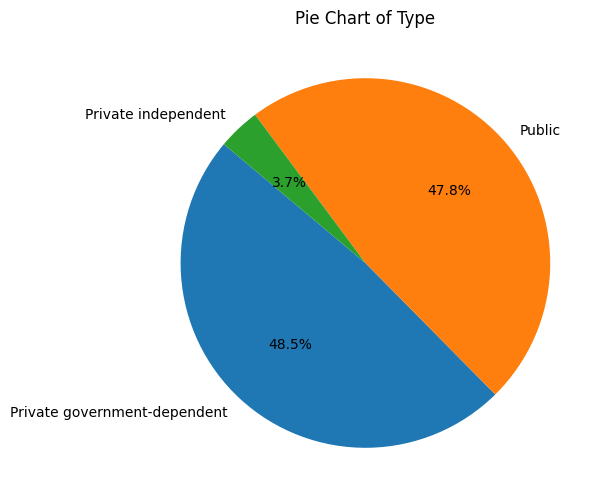

In [ ]:
# Crear una tabla de frecuencias para la variable 'sex'
plot = df['sex'].value_counts().reset_index()
plot.columns = ['Var1', 'Freq']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(plot['Var1'], plot['Freq'])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Bar Plot of Sex')
plt.show()

# Crear una tabla de frecuencias para la variable 'type'
plot = df['type'].value_counts().reset_index()
plot.columns = ['Var1', 'Freq']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(plot['Var1'], plot['Freq'])
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Bar Plot of Type')
plt.show()

# Crear una tabla de frecuencias para la variable 'sex'
plot = df['sex'].value_counts().reset_index()
plot.columns = ['Var1', 'Freq']

# Crear el gráfico circular
plt.figure(figsize=(8, 6))
plt.pie(plot['Freq'], labels=plot['Var1'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Sex')
plt.show()

# Crear una tabla de frecuencias para la variable 'sex'
plot = df['sex'].value_counts().reset_index()
plot.columns = ['Var1', 'Freq']

# Crear el gráfico circular
plt.figure(figsize=(8, 6))
plt.pie(plot['Freq'], labels=plot['Var1'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Sex')
plt.show()

# Crear una tabla de frecuencias para la variable 'type'
plot = df['type'].value_counts().reset_index()
plot.columns = ['Var1', 'Freq']

# Crear el gráfico circular
plt.figure(figsize=(8, 6))
plt.pie(plot['Freq'], labels=plot['Var1'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Type')
plt.show()


### Prueba de Chi-Cuadrado

Veamos si existe una asociación entre el género de los estudiantes y el tipo de establecimiento en el que estudian. En este paso, visualizamos las proporciones condicionales de la variable `type` por cada categoría de la variable `sex` para finalmente estimar un chi-cuadrado usando `stats.chi2_contingency`.

In [ ]:
# Generación de la tabla de contingencia con la función crosstab
contingency_table = pd.crosstab(pisa2009_chl['type'], pisa2009_chl['sex'])

# Realizar la prueba de Chi-Cuadrado
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f'Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(ex)

Chi2: 11.40041644665721, p-value: 0.0033452688219367216, Degrees of Freedom: 2
Expected Frequencies:
[[1089.66837759 1084.33162241]
 [  83.20374916   82.79625084]
 [1073.12787324 1067.87212676]]


#### Interpretación de la Prueba de Chi-Cuadrado (χ2)

La prueba de χ2 nos permite verificar la hipótesis nula de que no hay asociación entre las variables `type` y `sex`. Ahora, es muy importante comprender cómo se interpreta y reporta usando un estilo de escritura académica. Primero, debemos entender que si el valor *p* es lo suficientemente pequeño (por convención, *p* \< .05; *p* \< .01; *p* \< .001), se rechaza la hipótesis nula. Bajo ese escenario, para nuestro ejemplo, esto indicaría que el género de los estudiantes está asociado con el tipo de establecimiento en el que estudian. Segundo, para reportar en un informe es posible formularlo así:

"Existe una asociación estadísticamente significativa entre el género de los estudiantes y la dependencia administrativa del establecimiento en el que estudian (*χ2*(2) = 11.40, *p* \< .01)."

Notar que en el paréntesis reportamos el valor del estadístico *χ2*, seguido por los grados de libertad y el valor *p*.

### Prueba U de Mann-Whitney

La prueba U de Mann-Whitney es una prueba no paramétrica que se utiliza para comparar las diferencias entre dos grupos independientes cuando la variable de interés no sigue una distribución normal. En este caso, se usará para comparar el estatus socioeconómico (estatus socioeconómico) entre niños y niñas.

-   Primero, aseguramos que las variables de interés están en formato numérico, lo cual es necesario para realizar la prueba.

In [ ]:
pisa2009_chl['ses'] = pd.to_numeric(pisa2009_chl['ses'], errors='coerce')

count    5580.000000
mean       -0.505586
std         1.164141
min        -4.245100
25%        -1.348025
50%        -0.566100
75%         0.361500
max         2.881400
Name: ses, dtype: float64
1.1641414923365998
1.3552254141796856
         count      mean       std     min     25%      50%       75%     max
sex                                                                          
Female  2756.0 -0.503617  1.181322 -3.8669 -1.3640 -0.56100  0.383675  2.8814
Male    2824.0 -0.507508  1.147333 -4.2451 -1.3322 -0.57775  0.330450  2.5794
U-statistic: 3897362.0, p-value: 0.9220190325625239


<ipython-input-40-45e2bb85f07a>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pisa2009_chl.groupby('sex')['ses'].describe())


-   **Cálculo de Estadísticos Descriptivos**: Obtenemos estadísticas básicas como la media, desviación estándar y varianza del estatus socioeconómico (estatus socioeconómico) para entender mejor la distribución de la variable.

In [ ]:
print(pisa2009_chl['ses'].describe())  # Resumen descriptivo de estatus socioeconómico
print(pisa2009_chl['ses'].std())  # Desviación estándar de estatus socioeconómico
print(pisa2009_chl['ses'].var())  # Varianza de estatus socioeconómico

-   Además, calculamos estadísticas descriptivas del estatus socioeconómico por grupo de género.

In [ ]:
print(pisa2009_chl.groupby('sex')['ses'].describe())

-   **Visualización de la Distribución**: para comprender mejor la distribución de los datos, generamos varios tipos de gráficos, incluyendo histogramas, gráficos de densidad y gráficos cuartil-cuartil (Q-Q plot).

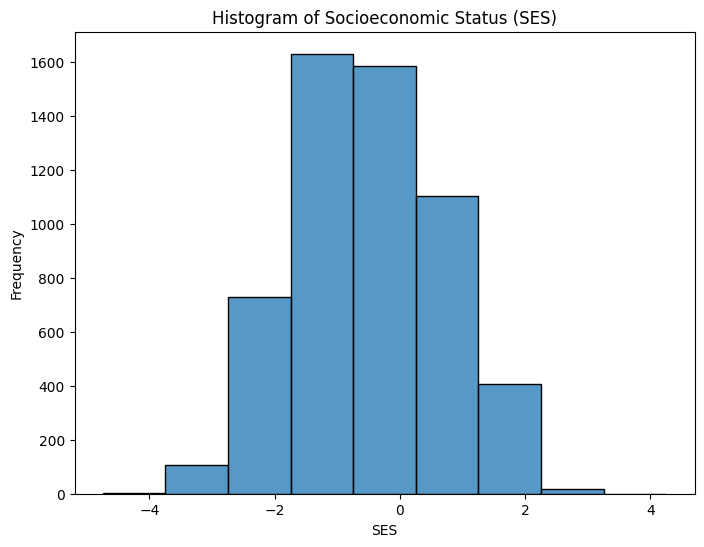

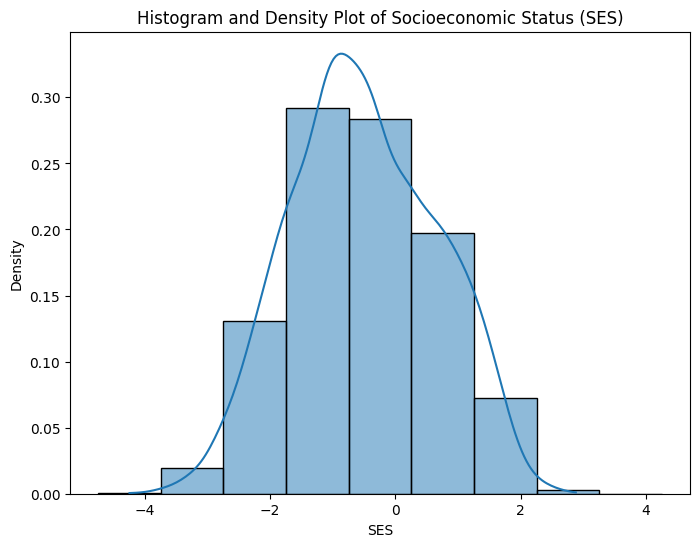

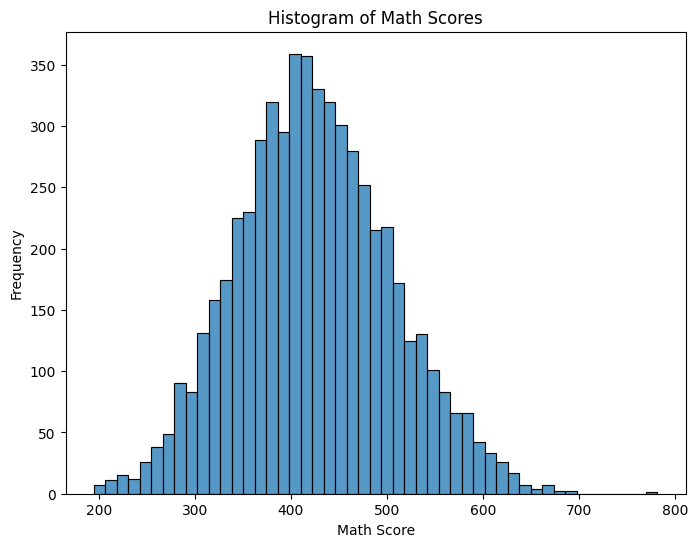

In [ ]:
# Histograma de la variable 'ses'
plt.figure(figsize=(8, 6))
sns.histplot(df['ses'], kde=False)
plt.xlabel('SES')
plt.ylabel('Frequency')
plt.title('Histogram of Socioeconomic Status (SES)')
plt.show()

# Histograma y gráfico de densidad combinados para la variable 'ses'
plt.figure(figsize=(8, 6))
sns.histplot(df['ses'], kde=True, stat="density")
plt.xlabel('SES')
plt.ylabel('Density')
plt.title('Histogram and Density Plot of Socioeconomic Status (SES)')
plt.show()

# Histograma de la variable 'math'
plt.figure(figsize=(8, 6))
sns.histplot(df['math'], kde=False)
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Histogram of Math Scores')
plt.show()

-   El gráfico cuartil-cuartil (Q-Q plot) nos ayuda a visualizar si la distribución del estatus socioeconómico sigue una distribución normal. Si los puntos en el gráfico se distribuyen aproximadamente a lo largo de una línea diagonal, entonces se puede concluir que la variable se distribuye normalmente.

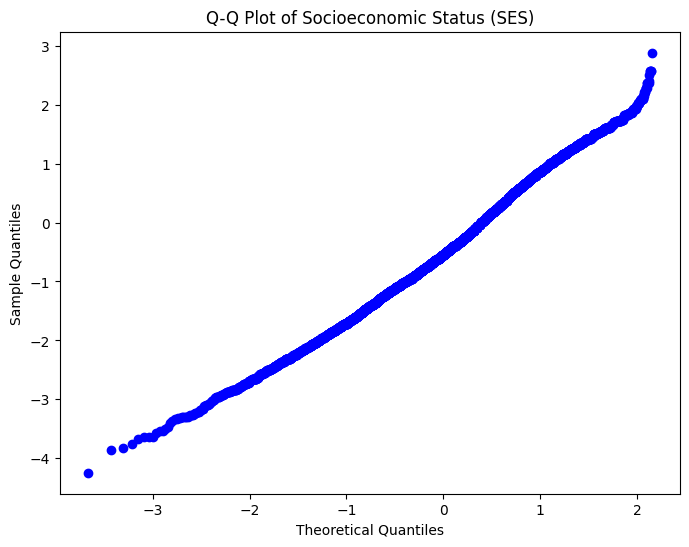

In [ ]:
plt.figure(figsize=(8, 6))
stats.probplot(df['ses'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Socioeconomic Status (SES)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [ ]:
### Prueba de Normalidad Shapiro-Wilk

La prueba de Shapiro-Wilk evalúa formalmente si una muestra sigue una distribución normal. Esto es importante para determinar si es apropiado usar pruebas paramétricas o si es necesario utilizar alternativas no paramétricas como la Prueba U de Mann-Whitney. Si el valor *p* de esta prueba es menor que 0.05, se rechaza la hipótesis nula de normalidad, sugiriendo que los datos no siguen una distribución normal.

In [ ]:
# Prueba de normalidad Shapiro-Wilk para los primeros 5000 casos de estatus socioeconómico
shapiro_test = stats.shapiro(pisa2009_chl['ses'].dropna()[:5000])
print(f'Shapiro-Wilk Test: {shapiro_test}')

Shapiro-Wilk Test: ShapiroResult(statistic=0.9919558639792816, pvalue=3.0824831581886867e-16)


#### Estimación de la Prueba U de Mann-Whitney

Finalmente, realizamos la Prueba U de Mann-Whitney para comparar el estatus socioeconómico entre niños y niñas bajo la siguiente pregunta de investigación: ¿Difieren significativamente los niños de las niñas en su estatus socioeconómico? Y establecemos las siguientes hipótesis estadísticas:

-   **Hipótesis nula (H0)**: No hay diferencia significativa en el estatus socioeconómico entre niños y niñas.
-   **Hipótesis alternativa (H1)**: Hay una diferencia significativa en el estatus socioeconómico entre niños y niñas.

In [ ]:
u_statistic, p_value = stats.mannwhitneyu(
    pisa2009_chl[pisa2009_chl['sex'] == 'Female']['ses'].dropna(),
    pisa2009_chl[pisa2009_chl['sex'] == 'Male']['ses'].dropna()
)
print(f'U-statistic: {u_statistic}, p-value: {p_value}')

U-statistic: 3897362.0, p-value: 0.9220190325625239


-   **Interpretación de los Resultados**: Interpretamos los resultados de la prueba U de Mann-Whitney, donde el valor de *p* indica si podemos rechazar la hipótesis nula de que no hay diferencias significativas entre los grupos.
    -   Si el valor de p es lo suficientemente pequeño (*p* \< .05), se rechaza la hipótesis nula.
    -   Esto indicaría que el estatus socio-económico de los estudiantes difiere significativamente entre niños y niñas.
    -   **Reporte de Resultados**: Los niños (Mdn = 1230) presentan significativamente menor estatus socioeconómico que las niñas (Me = 1245, W = 7311835, *p* \< .001).

### Prueba *H* de Kruskal-Wallis

La prueba *H* de Kruskal-Wallis es una prueba no paramétrica utilizada para comparar más de dos grupos independientes. Es una alternativa a ANOVA cuando no se cumple el supuesto de normalidad. En esta sección, la prueba se usará para evaluar si el estatus socioeconómico de los estudiantes difiere según el tipo de establecimiento al que asisten.

-   Primero, calculamos estadísticas descriptivas básicas del SES por cada tipo de establecimiento (type) para tener una idea preliminar de las diferencias entre los grupos.
-   Esta línea de código genera resúmenes estadísticos (como la media y la mediana) del SES para cada categoría del tipo de establecimiento, lo que ayuda a identificar posibles diferencias preliminares entre los grupos.

In [ ]:
print(pisa2009_chl.groupby('type')['ses'].describe())

                               count      mean       std     min      25%  \
type                                                                        
Private government-dependent  2135.0 -0.526903  0.983206 -3.8251 -1.19235   
Private independent            165.0  0.607113  0.707774 -1.6254  0.17530   
Public                        2097.0 -0.969168  1.062748 -4.2451 -1.74290   

                                 50%     75%     max  
type                                                  
Private government-dependent -0.5442  0.1935  2.0778  
Private independent           0.7010  1.1056  1.8849  
Public                       -0.9930 -0.2808  2.5002  


<ipython-input-48-b6a97bf611a6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pisa2009_chl.groupby('type')['ses'].describe())


-   **Formulación de la Pregunta de Investigación**: la pregunta de investigación que vamos a responder con la prueba H de Kruskal-Wallis es ¿difiere significativamente el estatus socioeconómico de los estudiantes según la dependencia del establecimiento al que asisten?
-   Formulamos las hipótesis nula y alternativa:
    -   **H0**: El estatus socio-económico de los estudiantes no difiere significativamente según la dependencia del establecimiento al que asisten.
    -   **H1**: El estatus socio-económico de los estudiantes sí difiere significativamente según la dependencia del establecimiento al que asisten.

#### Estimación de la Prueba *H* de Kruskal-Wallis

Realizamos la prueba *H* de Kruskal-Wallis para determinar si hay diferencias significativas en el estatus socioeconómico de los estudiantes según el tipo de establecimiento. Esta línea de código evalúa si las distribuciones del estatus socioeocnómico son diferentes entre los grupos definidos por la variable `type` (tipo de establecimiento).

In [ ]:
kruskal_test = stats.kruskal(
    *[group['ses'].dropna() for name, group in pisa2009_chl.groupby('type')]
)
print(f'Kruskal-Wallis Test: {kruskal_test}')

Kruskal-Wallis Test: KruskalResult(statistic=422.5355809222295, pvalue=1.7683344136785536e-92)


<ipython-input-50-aad3463e4024>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  *[group['ses'].dropna() for name, group in pisa2009_chl.groupby('type')]


-   **Interpretación de los Resultados**: interpretamos el estadístico *H* y su valor de *p* resultante para determinar si podemos rechazar la hipótesis nula. Si el valor de *p* es lo suficientemente pequeño (*p* \< .05), se rechaza la hipótesis nula. Esto indicaría que existen diferencias significativas en el estatus socioeconómico de los estudiantes según la dependencia del establecimiento.
-   **Reporte de resultados**: El estatus socioeconómico de los estudiantes difiere según la dependencia del establecimiento al que asisten (*H*(2) = 422.54, *p* \< .001).

### Correlación de Spearman (ρ)

La correlación de Spearman (ρ) es una medida no paramétrica de la asociación lineal entre dos variables ordinales o no normalmente distribuidas. En esta sección, utilizaremos la correlación de Spearman para investigar si existe una asociación significativa entre el estatus socioeconómico de los estudiantes y su puntaje en matemáticas. La pregunta de investigación que abordaremos es: ¿Existe una asociación significativa entre el estatus socio-económico de los estudiantes y su puntaje en matemáticas? Y formulamos las hipótesis nula y alternativa:

-   **H0**: El estatus socioeconómico de los estudiantes no se asocia a los puntajes de matemáticas.
-   **H1**: El estatus socioeconómico de los estudiantes sí se asocia a los puntajes de matemáticas.

Antes de calcular la correlación, es útil visualizar la relación entre el estatus socioeconómico y los puntajes en matemáticas para tener una idea preliminar de la posible asociación. Estos gráficos muestran la relación entre estatus socioeconómico y el puntaje en matemáticas, lo que nos permite observar si existe algún patrón o tendencia entre las dos variables.


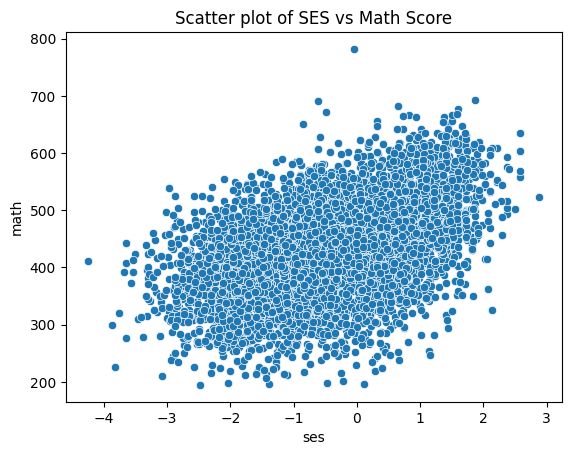

In [ ]:
sns.scatterplot(x='ses', y='math', data=pisa2009_chl)
plt.title('Scatter plot of SES vs Math Score')
plt.show()

#### Cálculo de la Correlación de Spearman

A continuación, calculamos el coeficiente de correlación de Spearman para evaluar la fuerza y dirección de la relación entre estatus socioeconómico y el puntaje en matemáticas. Esta línea de código calcula el coeficiente de correlación de Spearman (rho) junto con su valor de *p*, que indica si la correlación es estadísticamente significativa.

In [ ]:
# Eliminar filas con valores nulos en 'ses' o 'math'
df_clean = df[['ses', 'math']].dropna()

# Realizar nuevamente la correlación de Spearman
correlation, p_value = stats.spearmanr(df_clean['ses'], df_clean['math'])

# Mostrar los resultados
print(f"Spearman correlation: {correlation}")
print(f"P-value: {p_value}")

Spearman correlation: 0.4455669934512785
P-value: 2.094764225285374e-270


-   **Interpretación de los Resultados**: Finalmente, interpretamos el coeficiente de correlación y el valor de *p* para determinar si existe una asociación significativa entre las variables. Si el valor de p es lo suficientemente pequeño (*p* \< .05), se rechaza la hipótesis nula. Esto indica que existe una asociación significativa entre el estatus socio-económico y los puntajes en matemáticas.
-   **Reporte de resultados**: Existe una asociación significativa y positiva entre el estatus socioeconómico de los estudiantes y su puntaje en matemáticas (*ρ* = .45, *p* \< .001), siendo una fuerza de asociación moderada.
-   En este caso, si el coeficiente de Spearman es positivo y significativo, podemos concluir que a medida que aumenta el estatus socioeconómico de los estudiantes, también tienden a aumentar sus puntajes en matemáticas, y esta asociación es estadísticamente significativa.
-   También, interpretamos la magnitud o fuerza de asociación entre ambas variables evaluando el estadístico según los criterios de \@cohen2013.
    -   **Correlación pequeña (baja)**: r ≈ 0.10 a r = 0.29.
    -   **Correlación moderada (media)**: r ≈ 0.30 a r = 0.49.
    -   **Correlación alta**: r ≈ 0.50 a r = 1.00.
-   Estos valores proporcionan una orientación general para interpretar la magnitud de la relación entre dos variables. Es importante tener en cuenta que estos criterios son convenciones y deben interpretarse en el contexto específico del campo de estudio.

### Prueba *t* de Diferencia de Medias para Muestras Independientes

La prueba *t* para muestras independientes se utiliza para comparar las medias de dos grupos independientes, en este caso, el puntaje en matemáticas entre niños y niñas. Primero, obtenemos estadísticas descriptivas básicas del puntaje en matemáticas.

In [ ]:
print(pisa2009_chl['math'].describe())

count    5669.000000
mean      424.820547
std        80.518921
min       194.740000
25%       370.000000
50%       421.260000
75%       477.650000
max       782.060000
Name: math, dtype: float64


-   **Verificación de Supuestos de Normalidad**: antes de realizar la prueba *t*, verificamos si la variable sigue una distribución normal mediante varios métodos.

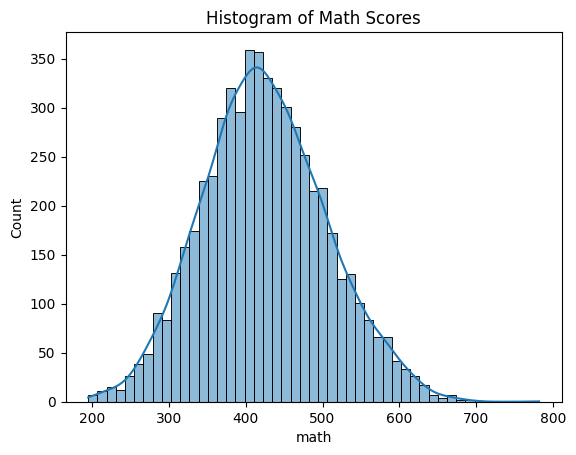

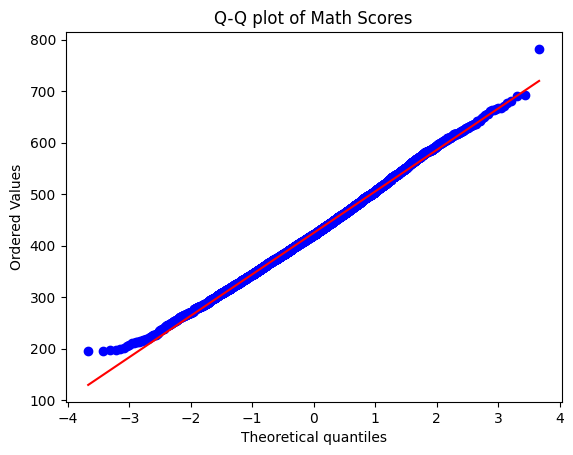

Shapiro-Wilk Test for Math: ShapiroResult(statistic=0.9967063273785082, pvalue=4.649112277175535e-09)


In [ ]:
# Verificación de supuestos de normalidad
sns.histplot(pisa2009_chl['math'].dropna(), kde=True)
plt.title('Histogram of Math Scores')
plt.show()

# Q-Q plot
stats.probplot(pisa2009_chl['math'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q plot of Math Scores')
plt.show()

# Prueba de Shapiro-Wilk
shapiro_test_math = stats.shapiro(pisa2009_chl['math'].dropna()[:5000])
print(f'Shapiro-Wilk Test for Math: {shapiro_test_math}')

-   **Prueba *t* de Diferencia de Medias**: realizamos la prueba *t* para determinar si hay diferencias significativas en el puntaje en matemáticas entre niños y niñas.

In [ ]:
t_stat, p_value = stats.ttest_ind(
    pisa2009_chl[pisa2009_chl['sex'] == 'Female']['math'].dropna(),
    pisa2009_chl[pisa2009_chl['sex'] == 'Male']['math'].dropna(),
    equal_var=True
)
print(f'T-test: t-statistic: {t_stat}, p-value: {p_value}')

T-test: t-statistic: -10.605105203263419, p-value: 4.9420560606247526e-26


-   Obtenemos el estadístico de *d* de Cohen para estimar el tamaño de efecto que refleja la magnitud de esta diferencia de medias expresado en unidades de desviación estándar.

### Análisis de Varianza (ANOVA)

El análisis de varianza (ANOVA) es una técnica estadística utilizada para comparar las medias de tres o más grupos independientes para determinar si al menos una de las medias es significativamente diferente de las demás. En esta sección, utilizaremos ANOVA para analizar si el puntaje promedio en matemáticas de los estudiantes difiere según la dependencia del establecimiento al que asisten. Antes de realizar el ANOVA, es útil visualizar la variación entre y dentro de los grupos utilizando un diagrama de caja (boxplot). Esto nos permite observar la dispersión de los puntajes en matemáticas para cada tipo de establecimiento.

La siguiente línea de código genera un gráfico que muestra la distribución de los puntajes en matemáticas para cada tipo de establecimiento (type). Si las cajas se superponen significativamente, podría no haber diferencias claras entre los grupos.

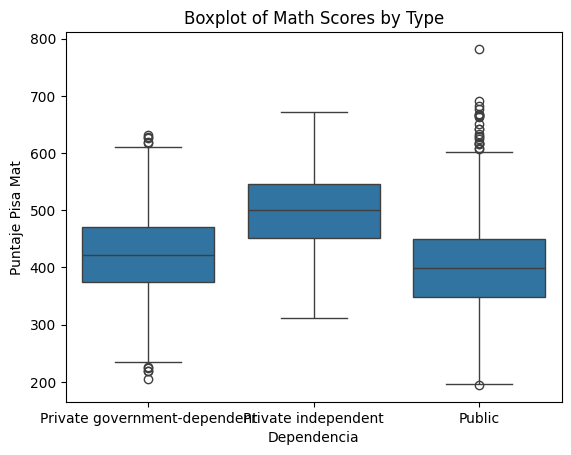

In [ ]:
sns.boxplot(x='type', y='math', data=pisa2009_chl)
plt.xlabel('Dependencia')
plt.ylabel('Puntaje Pisa Mat')
plt.title('Boxplot of Math Scores by Type')
plt.show()

In [ ]:
La pregunta de investigación que abordaremos con el ANOVA es la siguiente: dDifiere significativamente el puntaje promedio en matemáticas de los estudiantes según la dependencia del establecimiento al que asisten? Y formulamos las hipótesis nula y alternativa:

-   **H0**: No hay diferencias significativas en los puntajes promedios de matemáticas entre estudiantes en establecimientos de distintas dependencias.
-   **H1**: No todos los promedios son iguales.

Estimamos un modelo ANOVA utilizando la función `sm.formula.ols()` y `sm.stats.anova_lm()` para determinar si existen diferencias significativas en los puntajes promedios de matemáticas entre los diferentes tipos de establecimientos.

In [ ]:
model = sm.formula.ols('math ~ C(type)', data=pisa2009_chl).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F        PR(>F)
C(type)   1.687881e+06     2.0  155.566858  4.807682e-66
Residual  2.429287e+07  4478.0         NaN           NaN


-   La función `sm.stats.anova_lm()` calcula el estadístico *F*, que compara la variabilidad entre las medias de los grupos con la variabilidad dentro de los grupos. El resumen `print(anova_table)` proporcionará el valor del estadístico *F* y su significancia.
-   **Interpretación de los Resultados**: Interpretamos el valor del estadístico *F* y el valor p para determinar si podemos rechazar la hipótesis nula. Si el valor de p es lo suficientemente pequeño (*p* \< .05), se rechaza la hipótesis nula. Esto indica que existen diferencias significativas en los puntajes promedio de matemáticas entre los diferentes tipos de establecimientos.
-   **Reporte de Resultados**: El puntaje promedio de los estudiantes en matemáticas difiere según la dependencia del establecimiento al que asisten (*F*(1, 4479) = 243.2, *p* \< .001).
-   En este caso, si el valor *p* es menor que .05, podemos concluir que al menos uno de los grupos tiene un puntaje promedio en matemáticas significativamente diferente de los otros, lo que sugiere que la dependencia del establecimiento está asociado a los puntajes de los estudiantes.

### Correlación de Pearson (*r*)

La correlación de Pearson (*r*) es una medida que evalúa la fuerza y la dirección de la asociación lineal entre dos variables continuas. En esta sección, utilizaremos la correlación de Pearson para investigar si existe una asociación significativa entre los puntajes en matemáticas y los puntajes en lectura de los estudiantes. La pregunta de investigación que abordaremos es la siguiente: ¿existe una asociación significativa entre el puntaje en matemáticas y el puntaje en lectura de los estudiantes? Y formulamos las hipótesis nula y alternativa:

-   **H0**: Los puntajes en lectura de los estudiantes no se asocian significativamente a los puntajes de matemáticas.
-   **H1**: Los puntajes en lectura de los estudiantes sí se asocian significativamente a los puntajes de matemáticas.

Antes de calcular la correlación de Pearson, es útil visualizar la relación entre las dos variables para observar si existe una relación de forma lineal.

<ipython-input-78-29d5a3c4a926>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


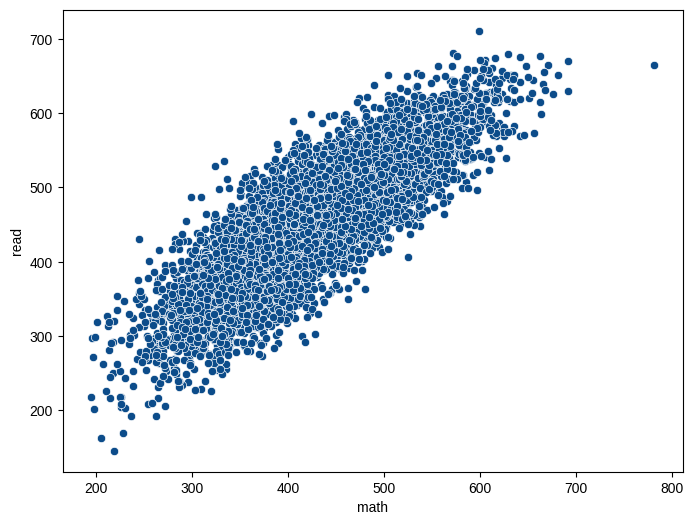

In [ ]:
# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pisa2009_chl, x='math', y='read', color='#0c4c8a')

# Aplicar un tema minimalista
plt.style.use('seaborn-whitegrid')

# Mostrar el gráfico
plt.show()

-   Estos gráficos muestran la relación entre los puntajes en matemáticas y lectura. Si los puntos se alinean en una tendencia lineal (ascendente o descendente), entonces sugiere una correlación entre las dos variables.
-   Calculamos una correlación de Pearson para cuantificar la fuerza y la dirección de la relación entre los puntajes en matemáticas y en lectura.

In [ ]:
from scipy.stats import pearsonr

# Calcular la correlación de Pearson
correlation, p_value = pearsonr(pisa2009_chl['math'], pisa2009_chl['read'])

# Mostrar los resultados
correlation, p_value

(0.8283717431233114, 0.0)

La función `pearsonr()` devuelve el coeficiente de correlación *r* junto con el valor *p*, que indica si la correlación es estadísticamente significativa.

-   **Cálculo del Coeficiente de Determinación** (*r²*): es una medida que indica qué proporción de la variabilidad en una de las variables se puede explicar por la otra variable.

In [ ]:
r_squared = correlation ** 2
r_squared

0.6861997448051534

-   El *r²* proporciona una interpretación adicional de la correlación, indicando la proporción de la variabilidad compartida entre las dos variables. Si lo multiplicas por 100, entonces puedes interpretarlo como un porcentaje.
-   **Interpretación de los Resultados**: interpretamos el coeficiente de correlación y el valor *p* para determinar si existe una asociación significativa entre las variables. Si el valor *p* es lo suficientemente pequeño (*p* \< .05), se rechaza la hipótesis nula. Esto indica que existe una asociación significativa entre los puntajes en matemáticas y lectura.
-   **Reporte de Resultados**: Existe una asociación significativa, positiva y alta entre los puntajes de lectura y los puntajes en matemáticas (*r* = .83, *p* \< .001). Los puntajes en matemáticas explican un 69% de los puntajes en lenguaje.
-   En este caso, si el valor *r* es positivo y significativo, podemos concluir que a medida que los puntajes en lectura aumentan, también a aumentan los puntajes en matemáticas, y esta asociación es estadísticamente significativa.
-   *r²* nos indica que aproximadamente el 69% de la variabilidad en los puntajes en lectura puede explicarse por los puntajes en matemáticas.

#### Generación de una Tabla de Correlación para Múltiples Variables

Si deseas observar las correlaciones entre múltiples variables, puedes generar una tabla de correlación. Esta línea de código gener una tabla y muestra las correlaciones entre las variables seleccionadas, lo que puede ser útil para explorar relaciones adicionales en los datos.

In [ ]:
# Seleccionar las columnas 7 a 9 (indexadas desde 0, por lo que son las columnas 6 a 8 en Python)
subset = pisa2009_chl.iloc[:, 6:9]

# Calcular la matriz de correlación
correlation_matrix = subset.corr()

# Redondear a dos decimales
correlation_matrix_rounded = correlation_matrix.round(2)

correlation_matrix_rounded

,math,read,scie
math,1.00,0.83,0.86
read,0.83,1.00,0.84
scie,0.86,0.84,1.00
